In [1]:
# Load and preview dataset
import pandas as pd

df = pd.read_csv('twitter_dataset.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB
None
   Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text  Retweets  Likes  \
0  Party least receive say or single. Prevent pre...         2     25   
1  Hotel still Congress may member staff. Media d...        35     29   
2  Nice be her debate industry that year. Film wh...        51     25   
3  Laugh explain situation career occur serio

In [2]:
# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [6]:
# Function to clean text by removing URLs, mentions, hashtags, and special characters
import re
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)    # Remove mentions
    text = re.sub(r'#\w+', '', text)    # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

In [7]:

# Apply the cleaning function to the Text column
df['Cleaned_Text'] = df['Text'].apply(clean_text)

In [8]:

# Check the cleaned data
df[['Text', 'Cleaned_Text', 'Timestamp']].head()


,Text,Cleaned_Text,Timestamp
0,Party least receive say or single. Prevent pre...,party least receive say or single prevent prev...,2023-01-30 11:00:51
1,Hotel still Congress may member staff. Media d...,hotel still congress may member staff media dr...,2023-01-02 22:45:58
2,Nice be her debate industry that year. Film wh...,nice be her debate industry that year film whe...,2023-01-18 11:25:19
3,Laugh explain situation career occur serious. ...,laugh explain situation career occur serious f...,2023-04-10 22:06:29
4,Involve sense former often approach government...,involve sense former often approach government...,2023-01-24 07:12:21


In [6]:
!pip install textblob
from textblob import TextBlob

# Function to compute sentiment polarity
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the Cleaned_Text column
df['Sentiment_Polarity'] = df['Cleaned_Text'].apply(get_sentiment_polarity)

# Categorize sentiment as Positive, Neutral, or Negative based on polarity score
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Category'] = df['Sentiment_Polarity'].apply(categorize_sentiment)

# Display the results
df[['Cleaned_Text', 'Sentiment_Polarity', 'Sentiment_Category']].head()


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   -------------------------------------- 626.3/626.3 kB 971.2 kB/s eta 0:00:00


,Cleaned_Text,Sentiment_Polarity,Sentiment_Category
0,party least receive say or single prevent prev...,0.115714,Positive
1,hotel still congress may member staff media dr...,0.308333,Positive
2,nice be her debate industry that year film whe...,0.220000,Positive
3,laugh explain situation career occur serious f...,0.054762,Positive
4,involve sense former often approach government...,0.033333,Positive


C:\Users\Jains\AppData\Local\Temp\ipykernel_15428\1542193336.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


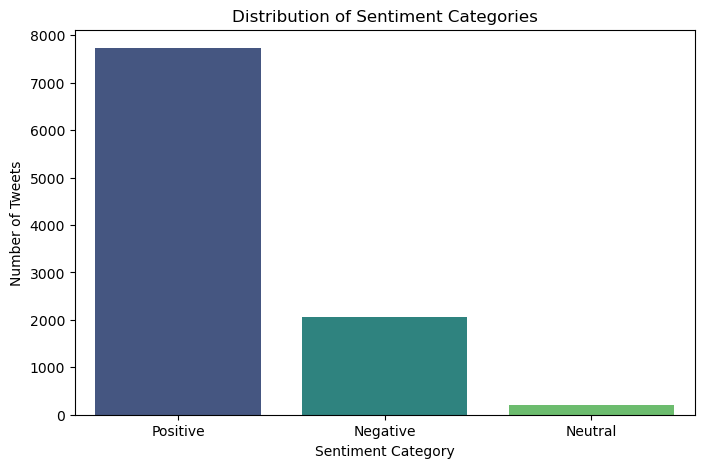

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment category
sentiment_counts = df['Sentiment_Category'].value_counts()

# Plot the distribution of sentiment categories
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Tweets')
plt.show()


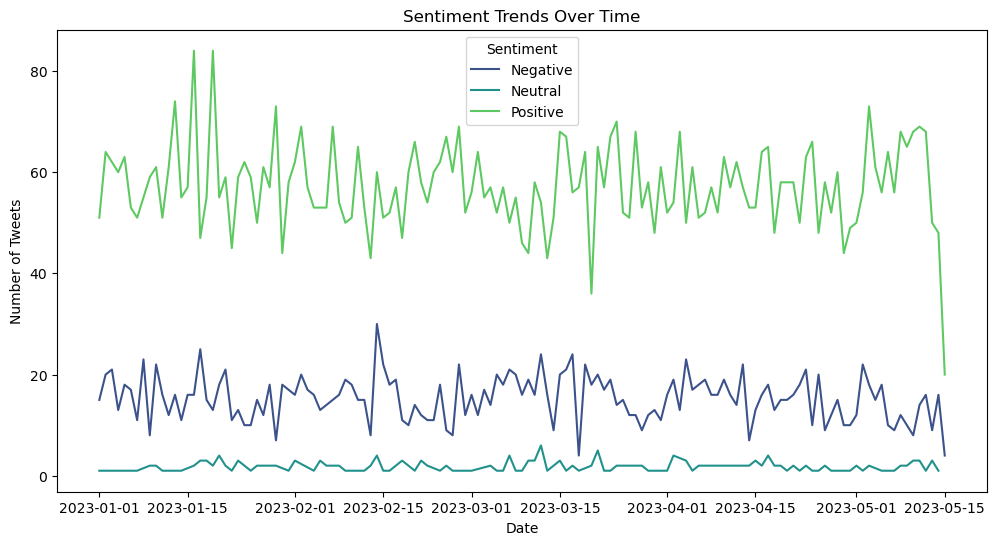

In [9]:
# Group data by date and sentiment category
df['Date'] = df['Timestamp'].dt.date
sentiment_trends = df.groupby(['Date', 'Sentiment_Category']).size().reset_index(name='Count')

# Plot sentiment trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_trends, x='Date', y='Count', hue='Sentiment_Category', palette='viridis')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.show()


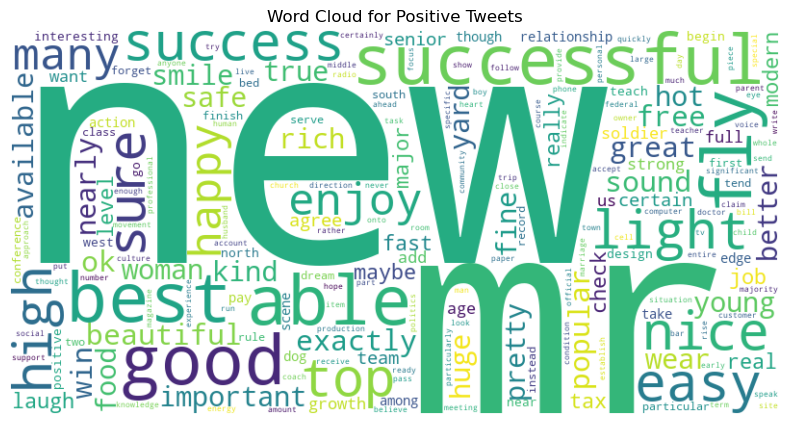

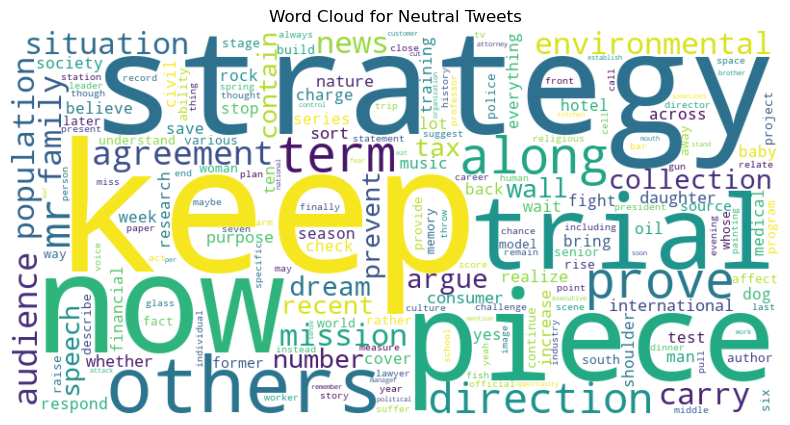

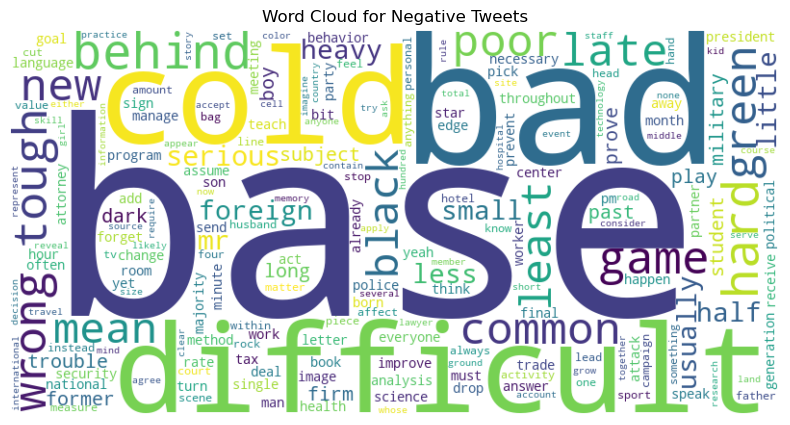

In [13]:
!pip install wordcloud
from wordcloud import WordCloud

# Function to create a word cloud for a specific sentiment
def create_wordcloud(sentiment):
    text = ' '.join(df[df['Sentiment_Category'] == sentiment]['Cleaned_Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.show()

# Generate word clouds
for sentiment in ['Positive', 'Neutral', 'Negative']:
    create_wordcloud(sentiment)


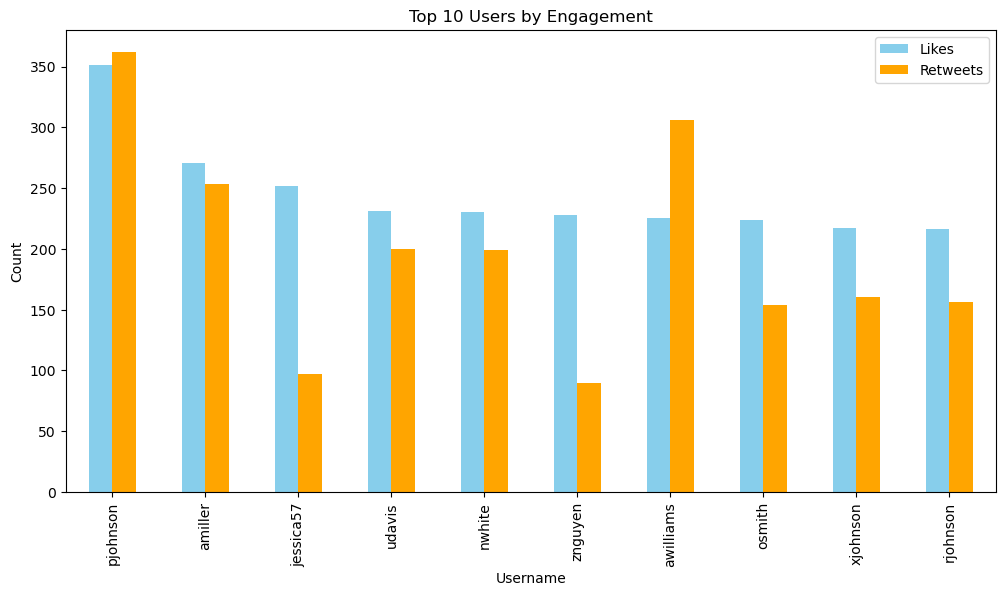

In [14]:
# Aggregate likes and retweets by username
top_users = df.groupby('Username')[['Likes', 'Retweets']].sum().sort_values(by='Likes', ascending=False).head(10)

# Plot top users
top_users.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Top 10 Users by Engagement')
plt.xlabel('Username')
plt.ylabel('Count')
plt.show()


C:\Users\Jains\AppData\Local\Temp\ipykernel_15428\2731982392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment_Category', y='Likes', palette='viridis')


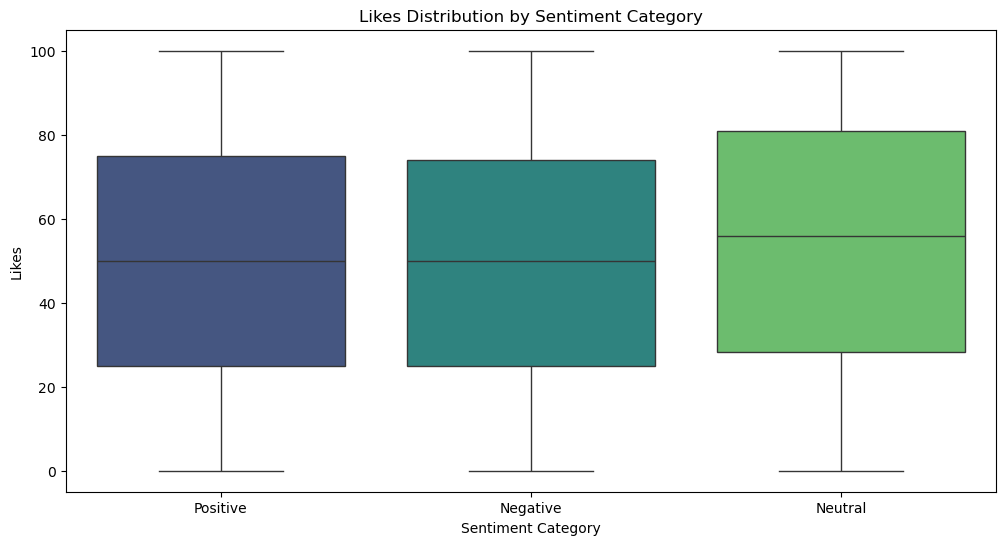

C:\Users\Jains\AppData\Local\Temp\ipykernel_15428\2731982392.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment_Category', y='Retweets', palette='viridis')


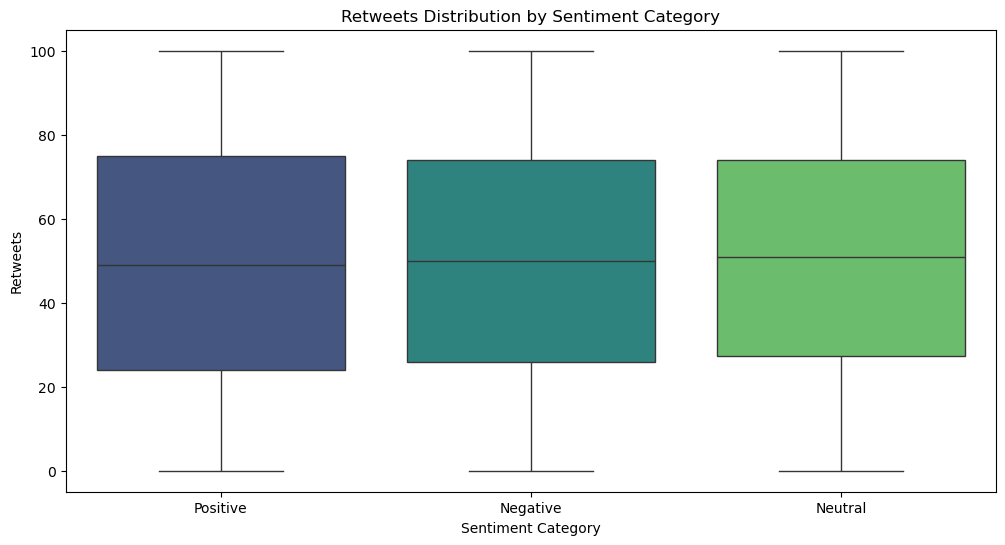

In [16]:
# Boxplot of Likes and Retweets by Sentiment Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sentiment_Category', y='Likes', palette='viridis')
plt.title('Likes Distribution by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Likes')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sentiment_Category', y='Retweets', palette='viridis')
plt.title('Retweets Distribution by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Retweets')
plt.show()


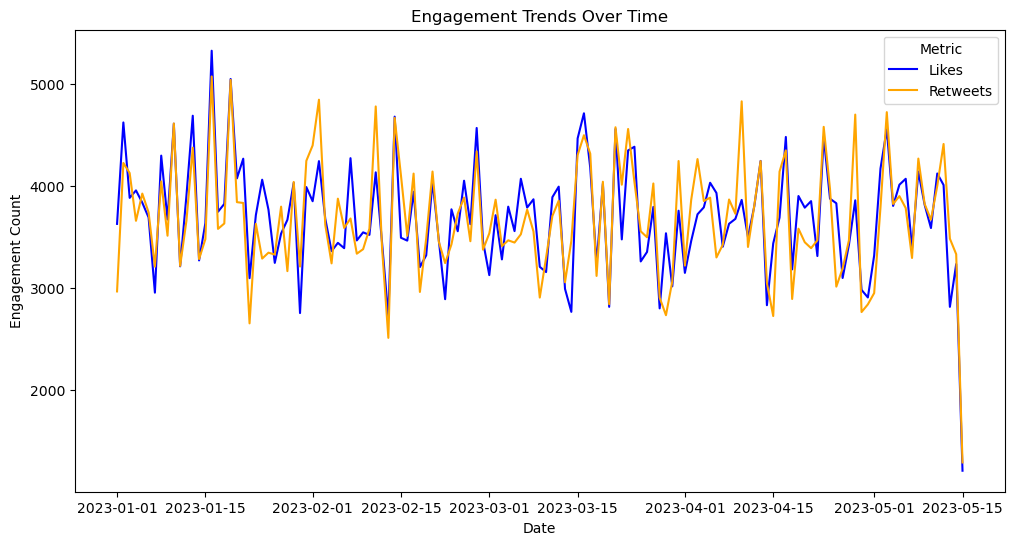

In [17]:
# Aggregate likes and retweets by date
engagement_trends = df.groupby(df['Timestamp'].dt.date)[['Likes', 'Retweets']].sum().reset_index()

# Plot engagement trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=engagement_trends, x='Timestamp', y='Likes', label='Likes', color='blue')
sns.lineplot(data=engagement_trends, x='Timestamp', y='Retweets', label='Retweets', color='orange')
plt.title('Engagement Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Engagement Count')
plt.legend(title='Metric')
plt.show()


C:\Users\Jains\AppData\Local\Temp\ipykernel_15428\3902613165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


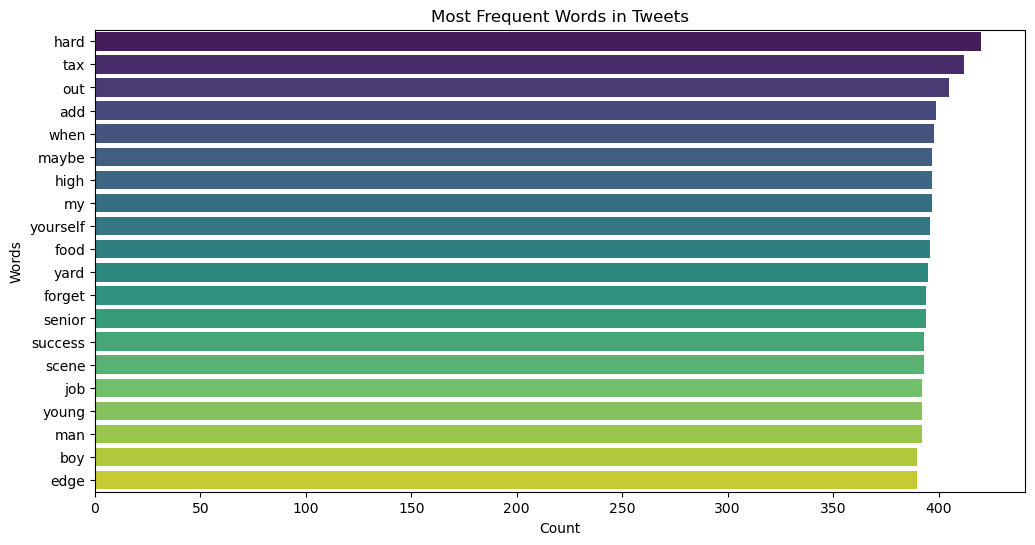

In [18]:
from collections import Counter

# Combine all words in the Cleaned_Text column
all_words = ' '.join(df['Cleaned_Text']).split()

# Count word frequencies
word_counts = Counter(all_words).most_common(20)
words, counts = zip(*word_counts)

# Plot the most frequent words
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Most Frequent Words in Tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()


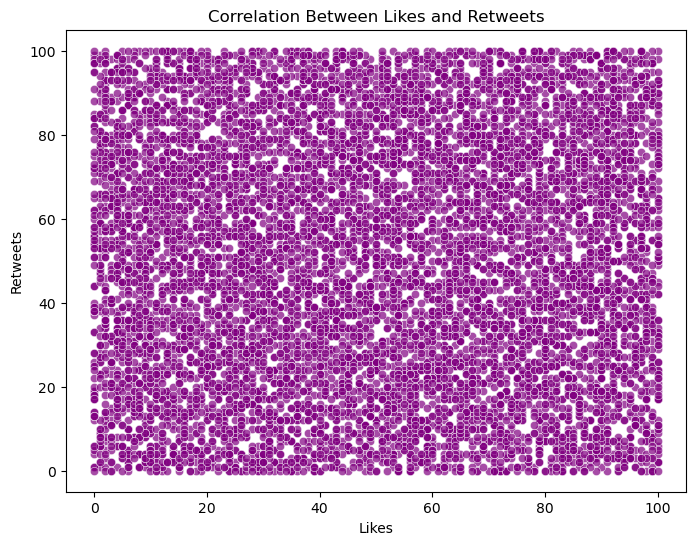

Correlation between Likes and Retweets:
              Likes  Retweets
Likes     1.000000  0.012798
Retweets  0.012798  1.000000


In [20]:
# Scatter plot of Likes vs. Retweets
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Likes', y='Retweets', alpha=0.7, color='purple')
plt.title('Correlation Between Likes and Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.show()

# Calculate correlation coefficient
correlation = df[['Likes', 'Retweets']].corr()
print("Correlation between Likes and Retweets:\n", correlation)


C:\Users\Jains\AppData\Local\Temp\ipykernel_15428\381061935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


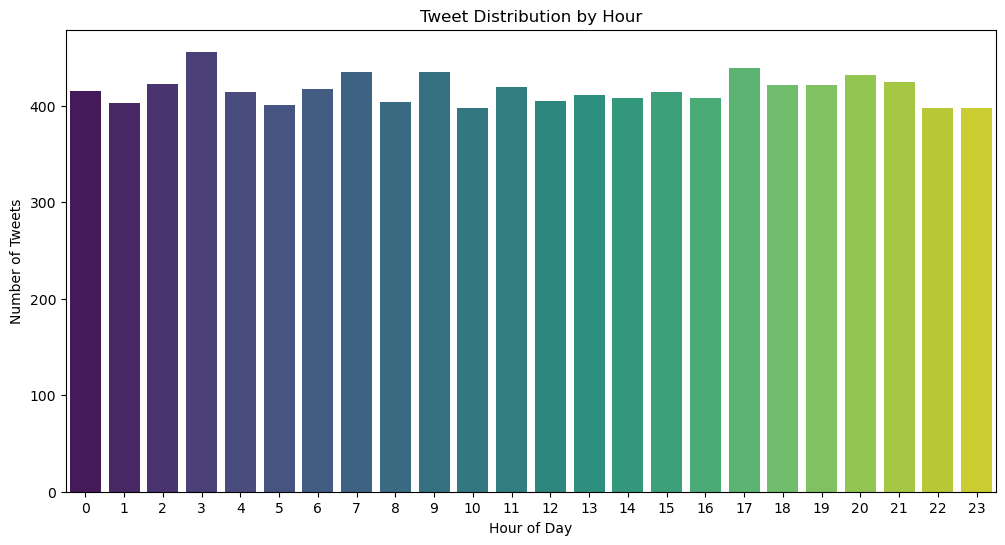

In [22]:
# Extract hour from the Timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Plot the distribution of tweets by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Tweet Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.show()


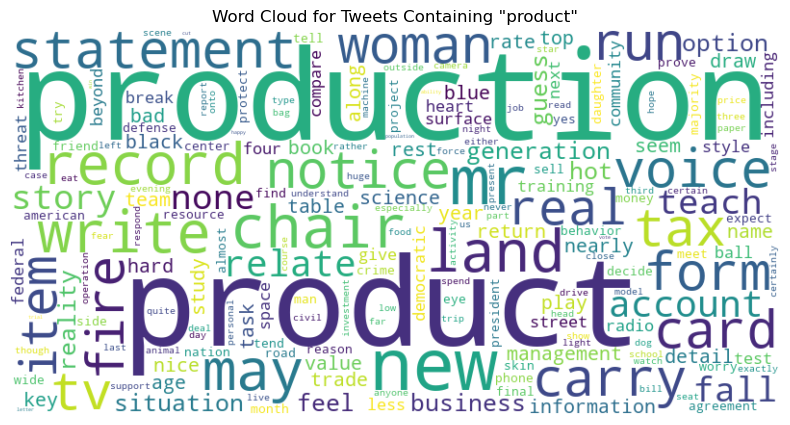

In [26]:
# Filter tweets containing a specific keyword
keyword = 'product'  # Example keyword
filtered_tweets = ' '.join(df[df['Cleaned_Text'].str.contains(keyword, na=False)]['Cleaned_Text'])

# Generate word cloud for the filtered tweets
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Tweets Containing "{keyword}"')
plt.show()
